# Importing Libraries

In [199]:
import numpy as np
import pandas as pd
import plotly.express as px
from numpy import mean
from numpy import std
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns
%matplotlib inline

In [200]:
df = pd.read_csv("data.csv")
df

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0,0.493687,0.539468,0.543230,0.604455,0.604462,0.998992,0.797409,0.809331,0.303510,...,0.799927,0.000466,0.623620,0.604455,0.840359,0.279606,0.027064,0.566193,1,0.029890
6815,0,0.475162,0.538269,0.524172,0.598308,0.598308,0.998992,0.797414,0.809327,0.303520,...,0.799748,0.001959,0.623931,0.598306,0.840306,0.278132,0.027009,0.566018,1,0.038284
6816,0,0.472725,0.533744,0.520638,0.610444,0.610213,0.998984,0.797401,0.809317,0.303512,...,0.797778,0.002840,0.624156,0.610441,0.840138,0.275789,0.026791,0.565158,1,0.097649
6817,0,0.506264,0.559911,0.554045,0.607850,0.607850,0.999074,0.797500,0.809399,0.303498,...,0.811808,0.002837,0.623957,0.607846,0.841084,0.277547,0.026822,0.565302,1,0.044009


# Data Exploration

In [201]:
#describe data
df.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


In [202]:
#data dimensions
df.shape

(6819, 96)

In [203]:
#data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

__2 Categorical Data__
- *__Liability Assets Flag__*: 1 if total liability exceeds total assets, else 0
- *__Net Income Flag__*: 1 if net income is negative in the last 2 years, else 0

### *__Imbalanced Data__*


Not Bankrupt => [6599]
Bankrupt => [220]



<AxesSubplot:xlabel='Bankrupt?', ylabel='count'>

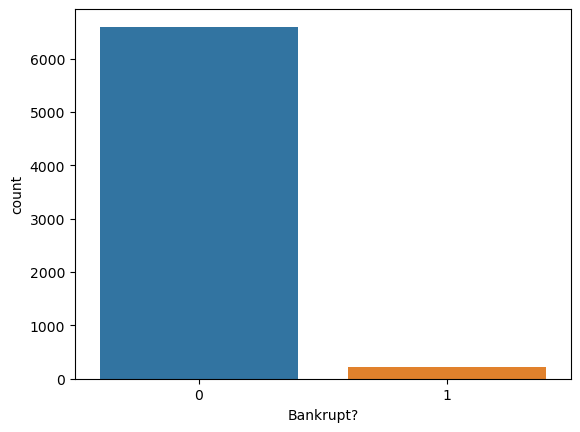

In [204]:
print(f"""
Not Bankrupt => {df[df["Bankrupt?"] == 0]["Bankrupt?"].value_counts().values}
Bankrupt => {df[df["Bankrupt?"] == 1]["Bankrupt?"].value_counts().values}
""")
sns.countplot(data=df, x=df['Bankrupt?'])

# Data Visualization

 ### __*Analysis Of Categorical Data*__
 - Liability Assets Flag

<AxesSubplot:xlabel=' Liability-Assets Flag', ylabel='count'>

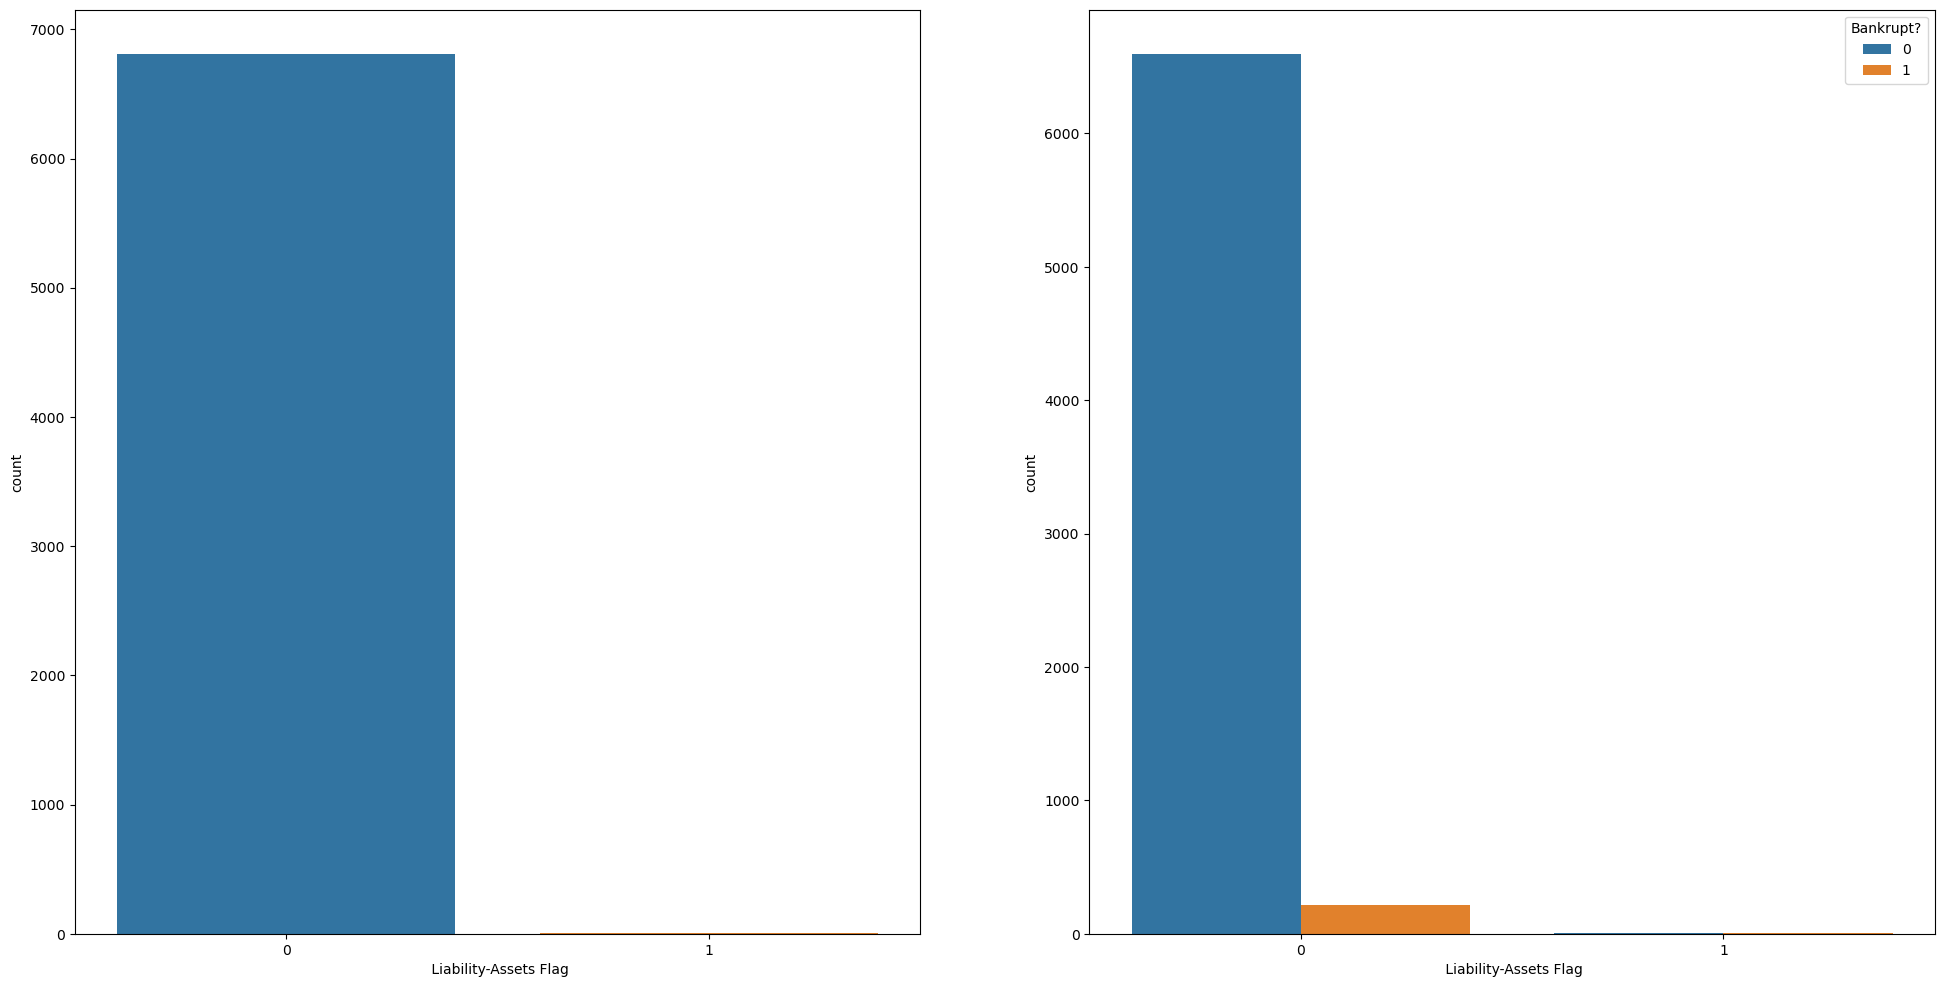

In [205]:
fig, ax = plt.subplots(1, 2, figsize=(24, 12))

sns.countplot(data=df, x=df[' Liability-Assets Flag'], ax=ax[0])
sns.countplot(data=df, x=df[' Liability-Assets Flag'], hue="Bankrupt?", ax=ax[1])

In [206]:
print(f"""
Liability-Assets Flag 0: Not bankrupt/Bankrupt => {df[df[" Liability-Assets Flag"] == 0]["Bankrupt?"].value_counts().values}
Liability-Assets Flag 1: Not bankrupt/Bankrupt => {df[df[" Liability-Assets Flag"] == 1]["Bankrupt?"].value_counts().values}
""")


Liability-Assets Flag 0: Not bankrupt/Bankrupt => [6597  214]
Liability-Assets Flag 1: Not bankrupt/Bankrupt => [6 2]



Companies are __*less likely*__ to go bankrupt when total liabilities do not exceed total assets.

However, there is still a minority of companies that went bankrupt with a liability-assets flag of 0.

 ### __*Analysis Of Categorical Data*__
 - Net Income Flag

<AxesSubplot:xlabel=' Net Income Flag', ylabel='count'>

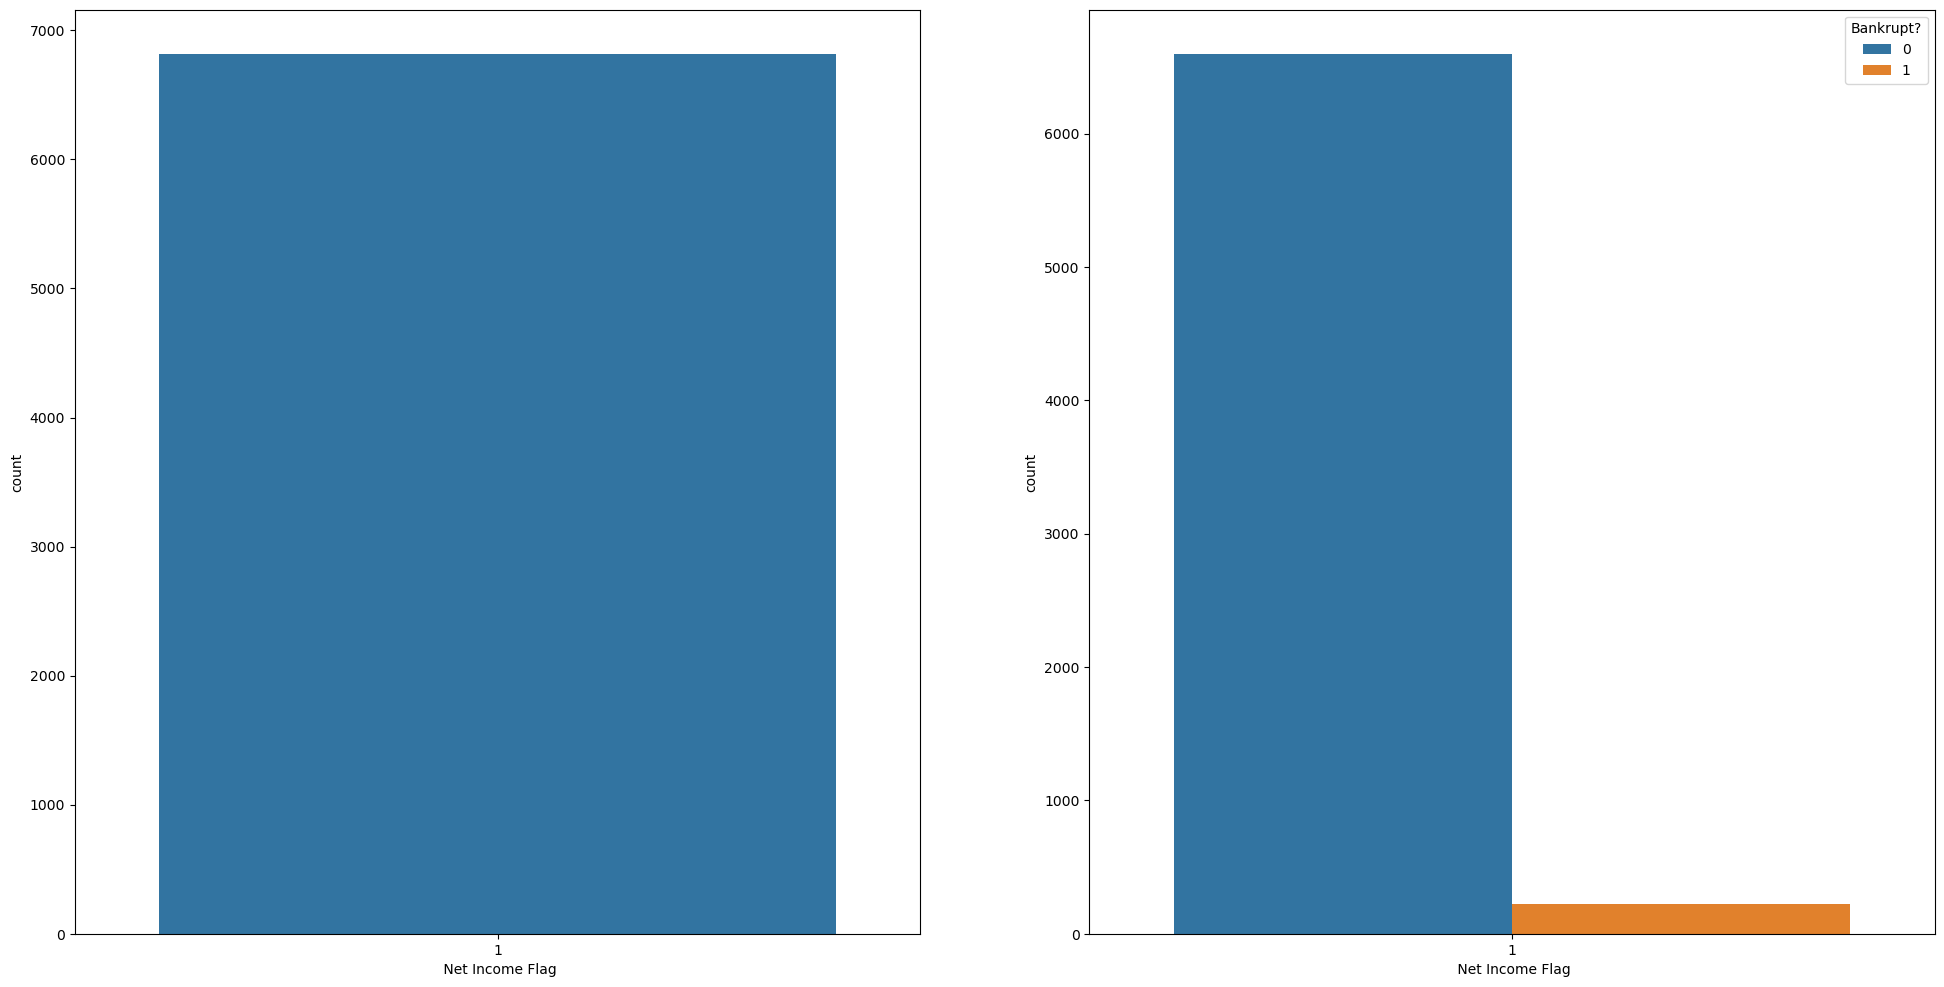

In [207]:
fig, ax = plt.subplots(1, 2, figsize=(24, 12))

sns.countplot(data=df, x=df[" Net Income Flag"], ax=ax[0])
sns.countplot(data=df, x=df[" Net Income Flag"], hue="Bankrupt?", ax=ax[1])

In [208]:
print(f"""
Net Income Flag 0: Not bankrupt/Bankrupt => {df[df[" Net Income Flag"] == 0]["Bankrupt?"].value_counts().values}
Net Income Flag 1: Not bankrupt/Bankrupt => {df[df[" Net Income Flag"] == 1]["Bankrupt?"].value_counts().values}
""")


Net Income Flag 0: Not bankrupt/Bankrupt => []
Net Income Flag 1: Not bankrupt/Bankrupt => [6599  220]



There are no companies with a net income flag of 0.

For companies with a net income flag of 1, which means a negative net income in the last 2 years, there is a minority of them who went bankrupt.

 ### __*Analysis Of Numerical Data: Finding Correlation*__

In [209]:
#drop categorical data
df.drop([' Net Income Flag',' Liability-Assets Flag'], axis='columns', inplace=True)

In [210]:
df.dtypes

Bankrupt?                                                     int64
 ROA(C) before interest and depreciation before interest    float64
 ROA(A) before interest and % after tax                     float64
 ROA(B) before interest and depreciation after tax          float64
 Operating Gross Margin                                     float64
                                                             ...   
 Net Income to Stockholder's Equity                         float64
 Liability to Equity                                        float64
 Degree of Financial Leverage (DFL)                         float64
 Interest Coverage Ratio (Interest expense to EBIT)         float64
 Equity to Liability                                        float64
Length: 94, dtype: object

In [211]:
df.shape

(6819, 94)

In [217]:
df_corr = abs(df.corr()["Bankrupt?"]).sort_values(ascending=False)
fig = px.bar(df_corr, orientation="h", color_discrete_sequence=["#C1E1C1"])
fig.update_layout(showlegend=False)
fig.show()

In [220]:
#Filtering top 10 features with highest absolute correlation
df_corr.head(11)

Bankrupt?                                                   1.000000
 Net Income to Total Assets                                 0.315457
 ROA(A) before interest and % after tax                     0.282941
 ROA(B) before interest and depreciation after tax          0.273051
 ROA(C) before interest and depreciation before interest    0.260807
 Net worth/Assets                                           0.250161
 Debt ratio %                                               0.250161
 Persistent EPS in the Last Four Seasons                    0.219560
 Retained Earnings to Total Assets                          0.217779
 Net profit before tax/Paid-in capital                      0.207857
 Per Share Net profit before tax (Yuan ¥)                   0.201395
Name: Bankrupt?, dtype: float64

### *Analysis Of Numerical Data: Describing Each Variable*

In [256]:
#for example, for Var 1: debt ratio % -> describing the data for rows where bankrupt = 1
df1 = df[[' Debt ratio %', 'Bankrupt?']]
df2 = df1[df1['Bankrupt?']==1]
df2.describe()

,Debt ratio %,Bankrupt?
count,220.000000,220.0
mean,0.187047,1.0
std,0.056234,0.0
min,0.001088,1.0
25%,0.158728,1.0
50%,0.187426,1.0
75%,0.214280,1.0
max,0.525410,1.0


In [257]:
#similarly for the other set of data for Var 1: describing rows where bankrupt = 0
df3 = df[[' Debt ratio %', 'Bankrupt?']]
df4 = df3[df3['Bankrupt?']==0]
df4.describe()

,Debt ratio %,Bankrupt?
count,6599.000000,6599.0
mean,0.110714,0.0
std,0.052071,0.0
min,0.000000,0.0
25%,0.071560,0.0
50%,0.109381,0.0
75%,0.145796,0.0
max,1.000000,0.0


<AxesSubplot:xlabel='Bankrupt?', ylabel=' Per Share Net profit before tax (Yuan ¥)'>

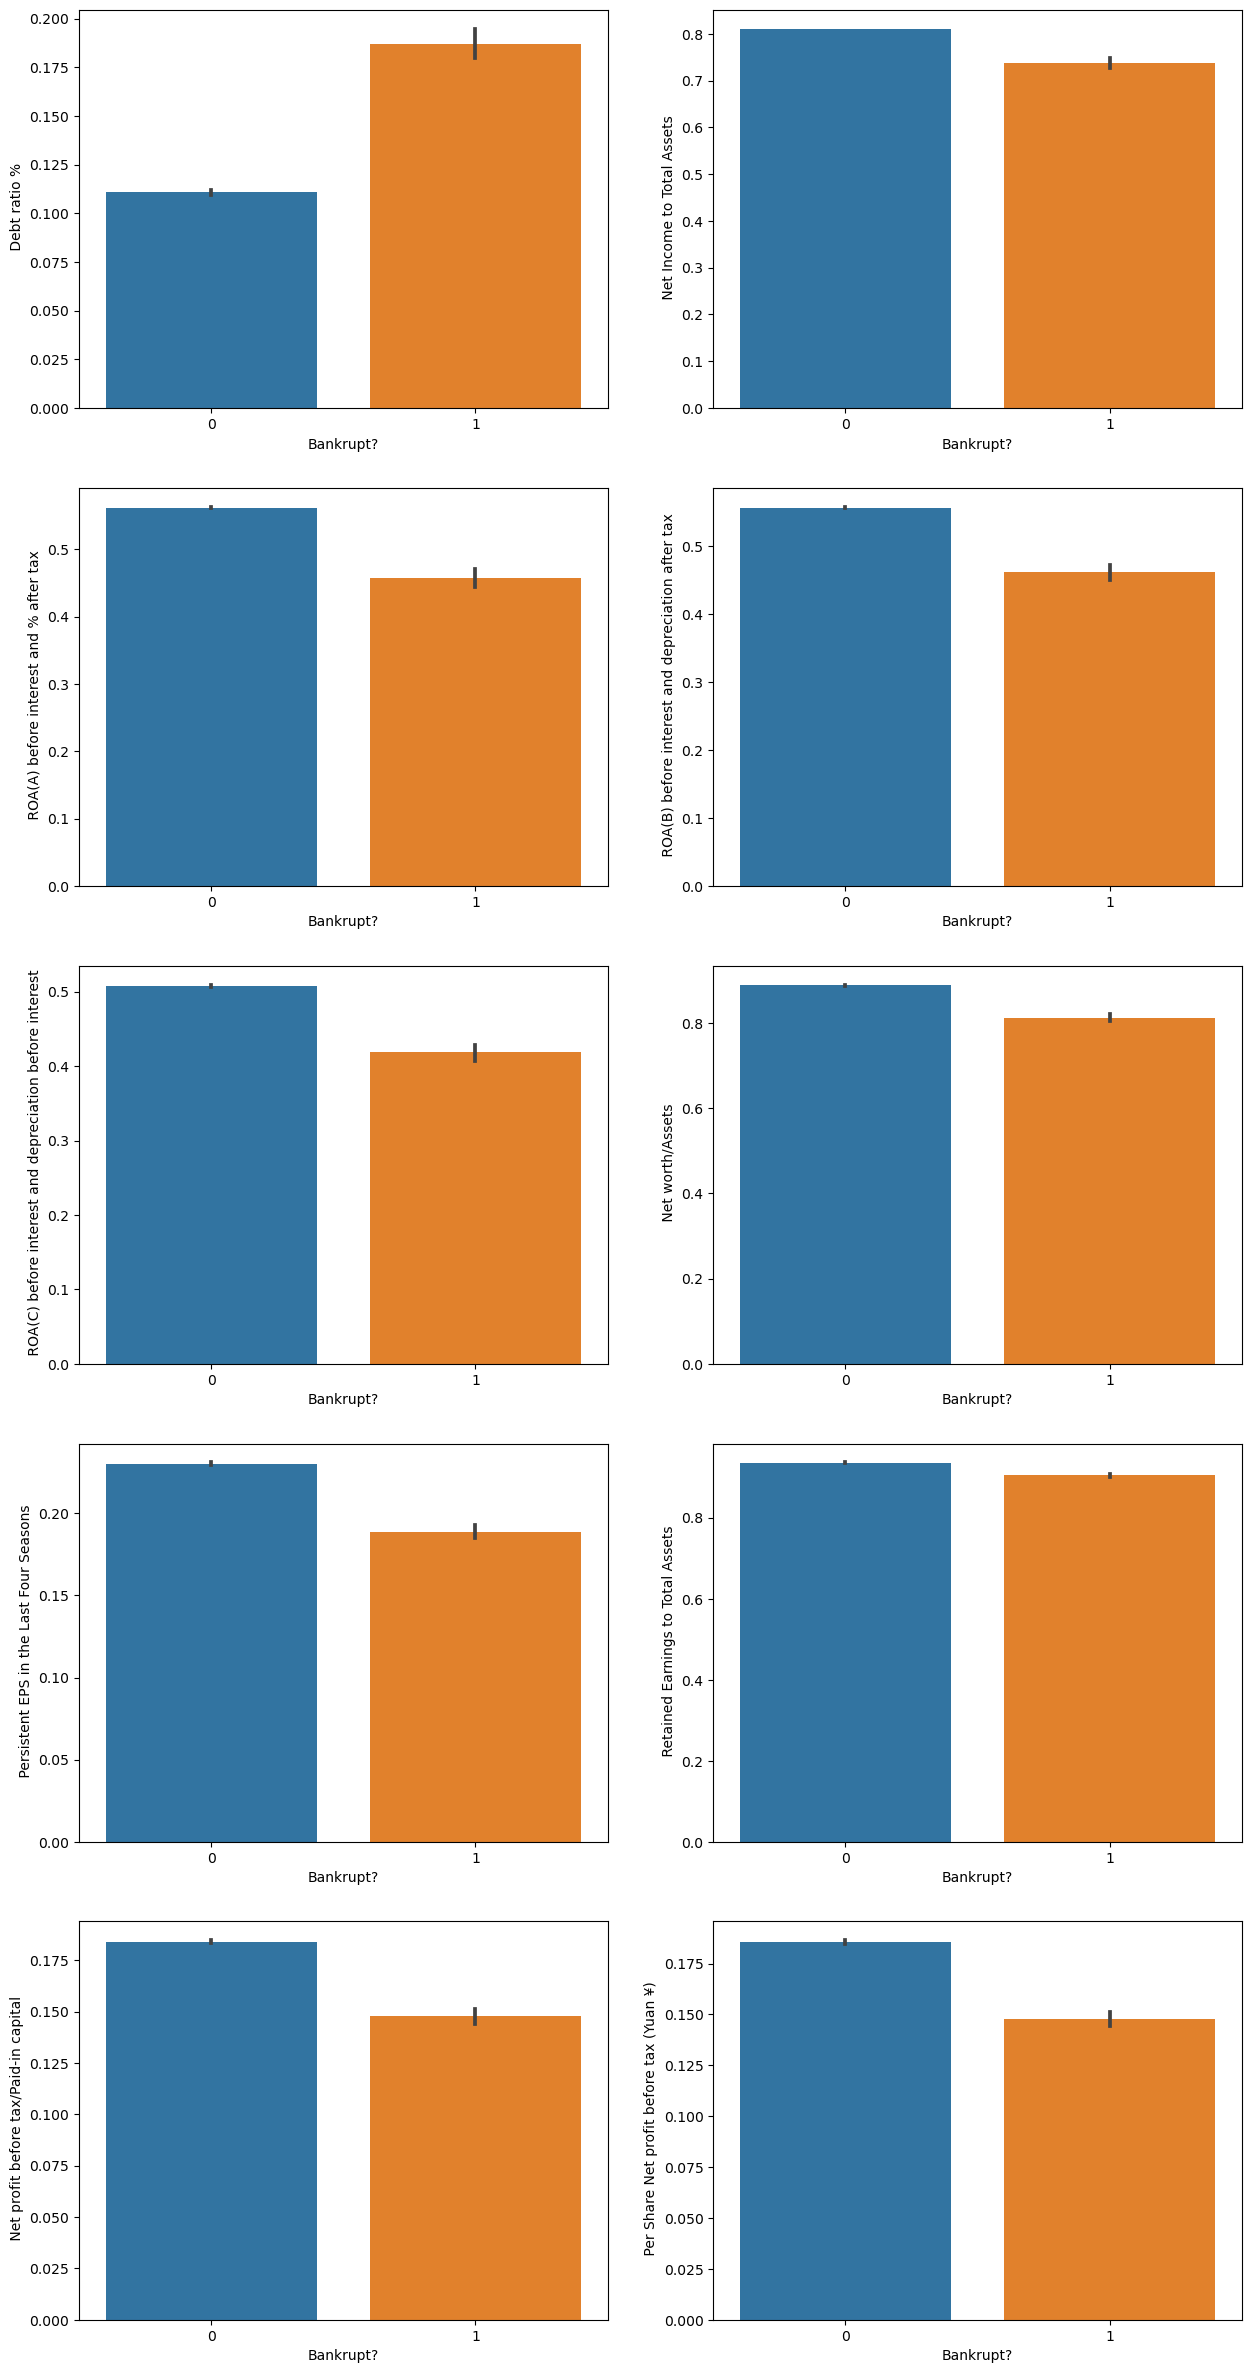

In [255]:
#visualization of described data using bar plots for all 10 variables
fig, ax = plt.subplots(5, 2, figsize=(15, 30))

sns.barplot(data=df, y=" Debt ratio %", x="Bankrupt?", ax=ax[0][0])
sns.barplot(data=df, y=" Net Income to Total Assets", x="Bankrupt?", ax=ax[0][1])
sns.barplot(data=df, y=" ROA(A) before interest and % after tax", x="Bankrupt?", ax=ax[1][0])
sns.barplot(data=df, y=" ROA(B) before interest and depreciation after tax", x="Bankrupt?", ax=ax[1][1])
sns.barplot(data=df, y=" ROA(C) before interest and depreciation before interest", x="Bankrupt?", ax=ax[2][0])
sns.barplot(data=df, y=" Net worth/Assets", x="Bankrupt?", ax=ax[2][1])
sns.barplot(data=df, y=" Persistent EPS in the Last Four Seasons", x="Bankrupt?", ax=ax[3][0])
sns.barplot(data=df, y=" Retained Earnings to Total Assets", x="Bankrupt?", ax=ax[3][1])
sns.barplot(data=df, y=" Net profit before tax/Paid-in capital", x="Bankrupt?", ax=ax[4][0])
sns.barplot(data=df, y=" Per Share Net profit before tax (Yuan ¥)", x="Bankrupt?", ax=ax[4][1])

__Debt Ratio %__: 
The difference between the means for bankrupt and non-bankrupt companies is *__highly distinctive__*, and it is very likely for debt ratio % to be *__highly indicative__* of a company's bankruptcy.

__Retained Earnings To Total Assets__, __Net Worth/Assets__, __Net Income To Total Assets__: 
The difference between the means for respective variables are almost *__negligible__* or *__minimal__* compared to the other variables, and are likely *__poor indicators__* to predict a company's bankruptcy.

In [262]:
df.drop(['Bankrupt?'], axis='columns', inplace=True)

In [265]:
df.to_csv('df.csv')